### Import the libraries

In [2]:
import numpy as np
import pandas as pd

### Get the data

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [4]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
project_titles = pd.read_csv('Asset_Id_Titles')

In [13]:
project_titles.head()

,item_id,title
0,1,ACC
1,2,ADANIENT
2,3,ADANIPORTS
3,4,ADANIPOWER
4,5,AJANTPHARM


Merge them together:

### Import vizualisation libraries

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
sns.set_style('white')

In [20]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
MCDOWELL-N    4.500000
SYNDIBANK     4.466102
M&M           4.447761
GMRINFRA      4.445230
ASHOKLEY      4.385768
DCBBANK       4.359589
TCS           4.344000
NMDC          4.292929
ITC           4.289744
MUTHOOTFIN    4.283293
Name: rating, dtype: float64

In [21]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
DCBBANK       584
JINDALSTEL    508
TORNTPHARM    507
ACC           452
MFSL          429
TATAMOTORS    420
MUTHOOTFIN    413
EICHERMOT     394
AMARAJABAT    392
ITC           390
Name: rating, dtype: int64

##### create a ratings dataframe with average rating and number of ratings:

In [22]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
ACC,3.878319
ADANIENT,3.206107
ADANIPORTS,3.033333
ADANIPOWER,3.550239
AJANTPHARM,3.302326


#####  Set the number of ratings column:

In [24]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [25]:
ratings.head()

,rating,rating_numbers
title,,
ACC,3.878319,452
ADANIENT,3.206107,131
ADANIPORTS,3.033333,90
ADANIPOWER,3.550239,209
AJANTPHARM,3.302326,86


##### Number of ratings histogram

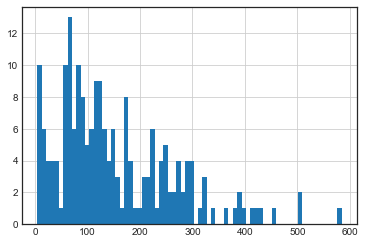

In [26]:
ratings['rating_numbers'].hist(bins=70)

#### Average rating per movie histogram

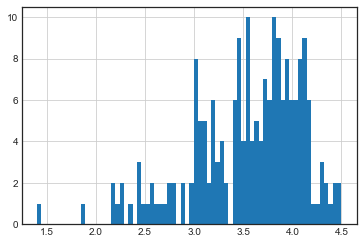

In [27]:
ratings['rating'].hist(bins=70)

##### Relationship between the average rating and the actual number of ratings
###### The larger the number of ratings, the project likely the rating of a project is

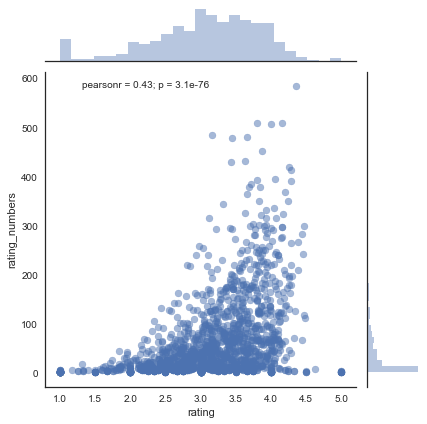

In [64]:
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)

## Recommending project


Let's create a matrix that has the user ids on one access and the project title on another axis. Each cell will then consist of the rating the user gave to that project.

In [28]:
projectmat = df.pivot_table(index='user_id', columns='title', values='rating')
projectmat.head()

title,ACC,ADANIENT,ADANIPORTS,ADANIPOWER,AJANTPHARM,ALBK,AMARAJABAT,AMBUJACEM,APOLLOHOSP,APOLLOTYRE,...,ULTRACEMCO,UNIONBANK,UPL,VEDL,VGUARD,VOLTAS,WIPRO,WOCKPHARMA,YESBANK,ZEEL
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,4.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Most rated projects

In [29]:
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
title,,
DCBBANK,4.359589,584
JINDALSTEL,4.155512,508
TORNTPHARM,4.007890,507
ACC,3.878319,452
MFSL,3.438228,429
TATAMOTORS,4.252381,420
MUTHOOTFIN,4.283293,413
EICHERMOT,4.060914,394
AMARAJABAT,3.798469,392


#### Let's choose two projects for our system: ACC, And MFSL

What are the user ratings for those two projects?

In [36]:
ACC_user_ratings = projectmat['ACC']
MFSL_user_ratings =projectmat['MFSL']

In [37]:
ACC_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: ACC, dtype: float64

#### correlation of every other project to that specific user behaviour on the ACC project

In [38]:
similar_to_acc = projectmat.corrwith(ACC_user_ratings)
similar_to_acc.head()

title
ACC           1.000000
ADANIENT      0.221784
ADANIPORTS    0.175794
ADANIPOWER    0.103135
AJANTPHARM    0.386475
dtype: float64

#### correlation of every other project to that specific user behaviour on the MFSL project

In [39]:
similar_to_MFSL = projectmat.corrwith(MFSL_user_ratings)
similar_to_MFSL.head()

title
ACC           0.188429
ADANIENT      0.370954
ADANIPORTS    0.319005
ADANIPOWER    0.023316
AJANTPHARM    0.478322
dtype: float64

##### remove the NaN values and use a DF instead of Series

In [40]:
corr_acc = pd.DataFrame(similar_to_acc, columns=['Correlation'])
corr_acc.dropna(inplace=True)

In [41]:
corr_acc.head()

,Correlation
title,
ACC,1.000000
ADANIENT,0.221784
ADANIPORTS,0.175794
ADANIPOWER,0.103135
AJANTPHARM,0.386475


### Perfectly correlated project with ACC? 


In [42]:
corr_acc.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
ACC,1.000000
HEXAWARE,0.866025
M&MFIN,0.712301
LUPIN,0.707673
ONGC,0.663215
NCC,0.541736
ALBK,0.529401
MCDOWELL-N,0.522233
CANFINHOME,0.504049


#### Set a threshold for the number of ratings necessary and filter out project that have less than a certain number of rates

join the 'number of ratings' column to our dataframe

In [43]:
corr_acc = corr_acc.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')
corr_acc.head()

,Correlation,rating_numbers
title,,
ACC,1.000000,452
ADANIENT,0.221784,131
ADANIPORTS,0.175794,90
ADANIPOWER,0.103135,209
AJANTPHARM,0.386475,86


filter out projects that have less than 100 rates (this value was chosen based off the ratings histogram from earlier)

In [44]:
corr_acc[corr_acc['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
title,,
ACC,1.000000,452
HDFC,0.432855,129
HCLTECH,0.426778,220
INFY,0.411731,219
SIEMENS,0.384972,220


### Perfectly correlated projects with MFSL?

In [45]:
corr_MFSL = pd.DataFrame(similar_to_MFSL, columns=['Correlation'])
corr_MFSL.head()

,Correlation
title,
ACC,0.188429
ADANIENT,0.370954
ADANIPORTS,0.319005
ADANIPOWER,0.023316
AJANTPHARM,0.478322


##### remove the NaN values and use a DF instead of Series

In [46]:
corr_MFSL.dropna(inplace=True)

In [47]:
corr_MFSL = corr_MFSL.join(ratings['rating_numbers'], how='left')
corr_MFSL.head()

,Correlation,rating_numbers
title,,
ACC,0.188429,452
ADANIENT,0.370954,131
ADANIPORTS,0.319005,90
ADANIPOWER,0.023316,209
AJANTPHARM,0.478322,86


filter out movies that have less than 100 reviews (this value was chosen randomly)

In [48]:
corr_MFSL[corr_MFSL['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
title,,
MFSL,1.000000,429
MARUTI,0.560029,293
PVR,0.516122,128
SIEMENS,0.504166,220
GAIL,0.478315,127
